In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<class 'ModuleNotFoundError'>: No module named 'Seaborn'

In [ ]:
df = pd.read_csv("sales_data_with_discounts.csv")
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [7]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
print(numerical_cols)


['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']


In [10]:
#calculate statistics
mean_vals = df[numerical_cols].mean()
median_vals = df[numerical_cols].median()
mode_vals = df[numerical_cols].mode().iloc[0]  # First mode if multiple
std_vals = df[numerical_cols].std()

# Combine into one DataFrame
summary = pd.DataFrame({
    'Mean': mean_vals,
    'Median': median_vals,
    'Mode': mode_vals,
    'Standard Deviation': std_vals
})

print(summary)


                           Mean       Median          Mode  Standard Deviation
Volume                 5.066667     4.000000      3.000000            4.231602
Avg Price          10453.433333  1450.000000    400.000000        18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000        50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822            4.220602
Discount Amount     3346.499424   988.933733     69.177942         4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801        46358.656624


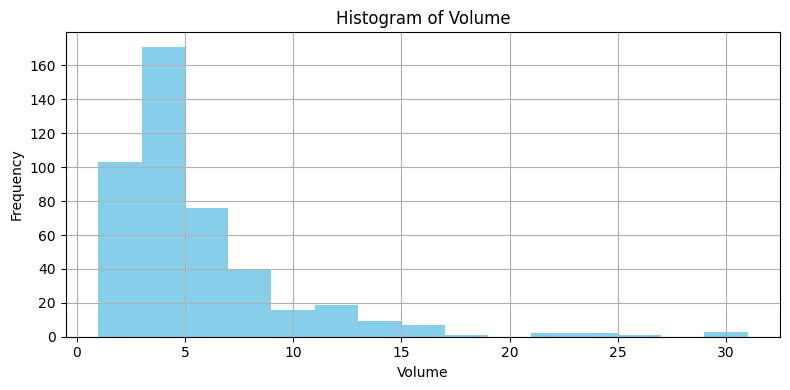

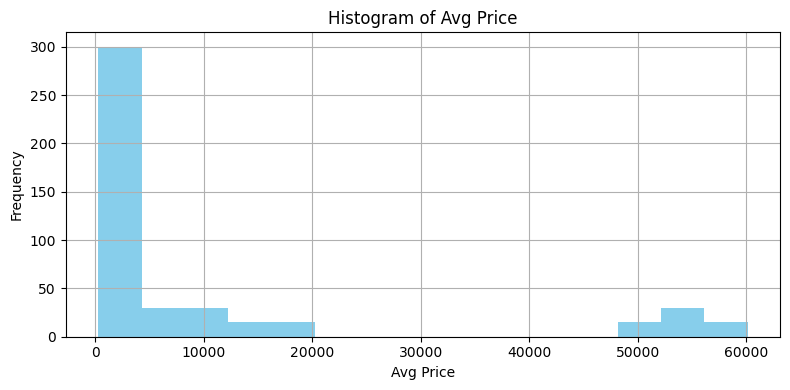

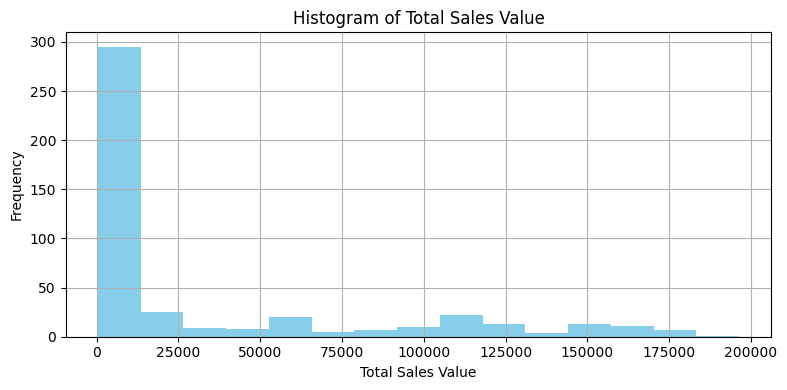

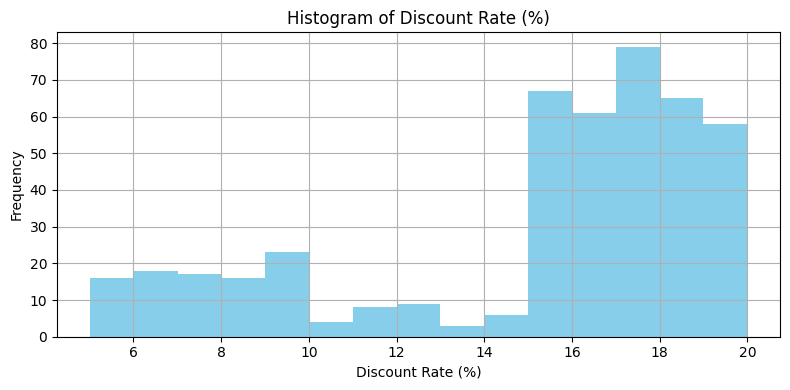

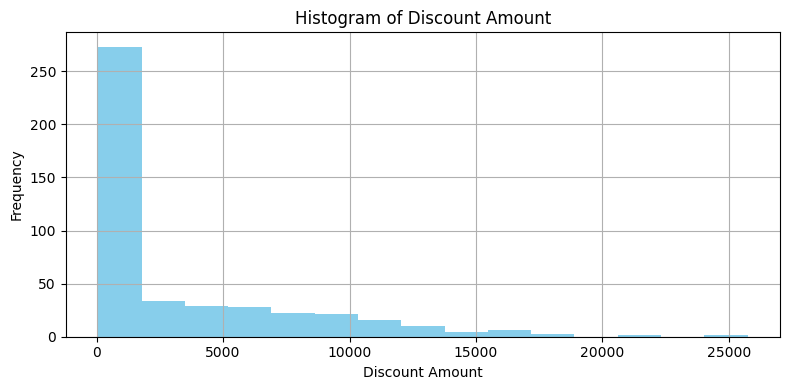

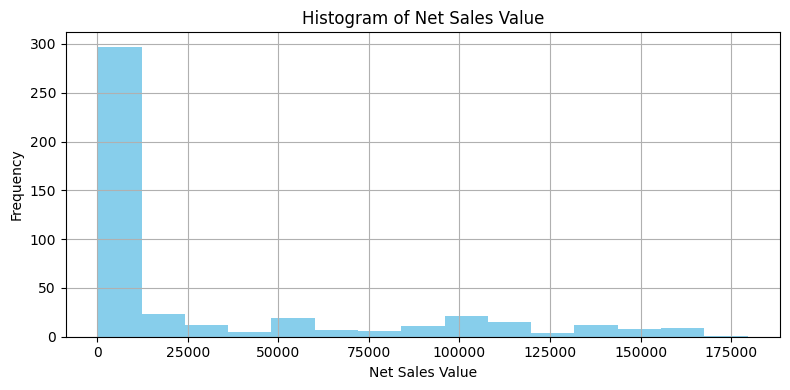

In [24]:
# Data Visualization
# Plot each histogram individually
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col], bins=15, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [25]:
"""1. Volume: In volume it is right skewed and having outliers
 2. Avg Price: It is right skewed, high priced items and strongly having the outliers
3 . Total Sales : Right skewed and having the high value sales
4 . Dicount Rate : Slightly left skewed and having minimal values
5 Discount Amount : Right skewed and having hing dicounts
6. Net sales Value : Strongly Right skewed and having high net values"""


'1. Volume: In volume it is right skewed and having outliers\n 2. Avg Price: It is right skewed, high priced items and strongly having the outliers\n3 . Total Sales : Right skewed and having the high value sales\n4 . Dicount Rate : Slightly left skewed and having minimal values\n5 Discount Amount : Right skewed and having hing dicounts\n6. Net sales Value : Strongly Right skewed and having high net values'

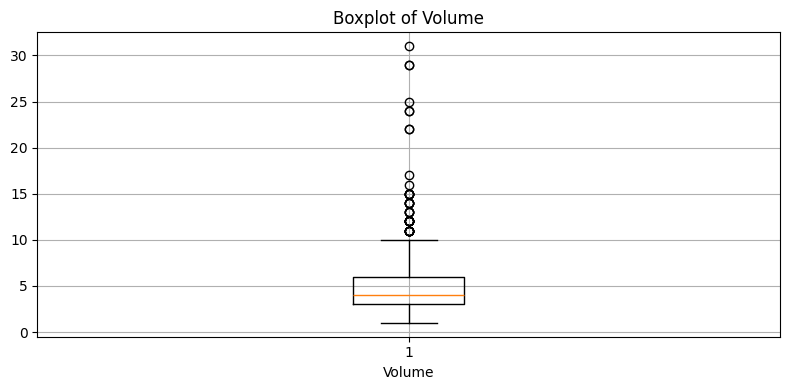

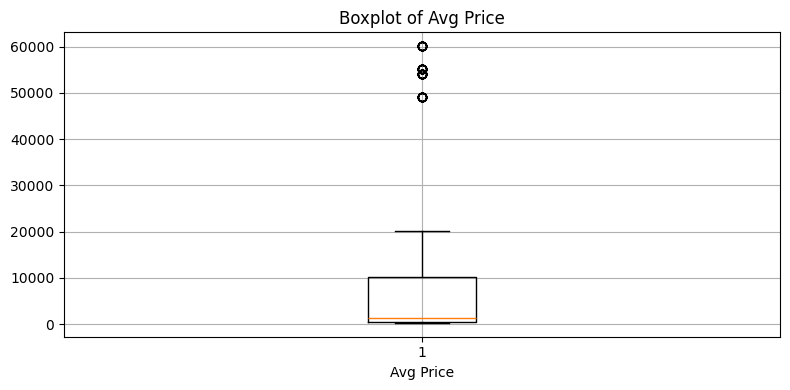

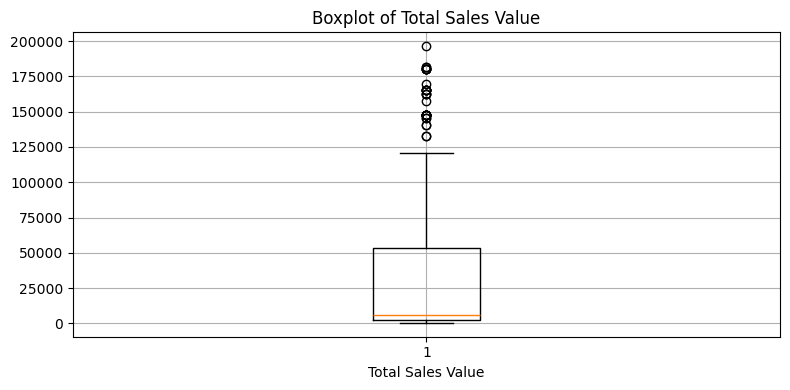

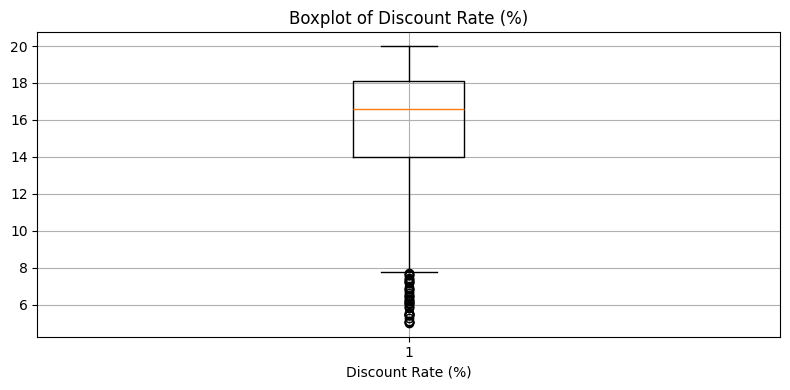

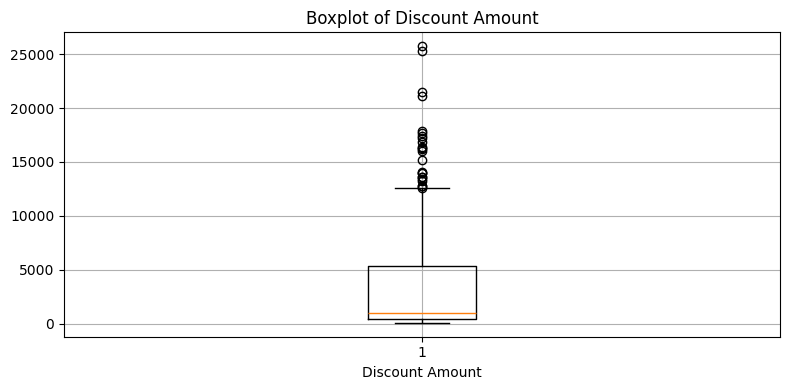

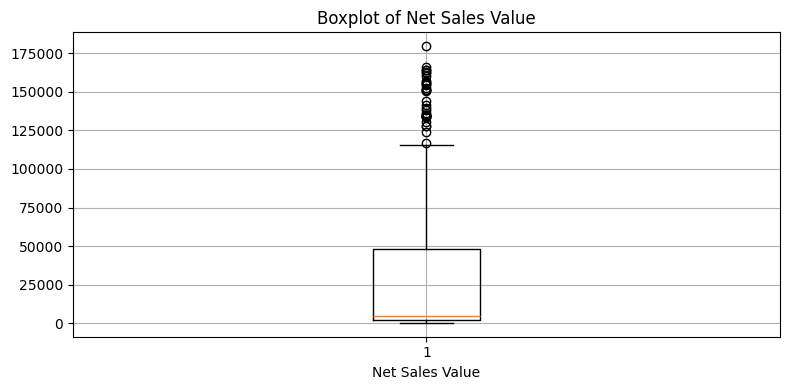

In [23]:
# Create boxplots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    plt.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [27]:
"""1. Volume: Outliers are present and are above the upper whisker length
 2. Avg Price: Outliers are present less as compared to volume and are above the upper whisker length
3 . Total Sales : Outliers are present and are above the upper whisker length
4 . Dicount Rate : Outliers are present and are below  the lower whisker length
5 Discount Amount :Outliers are present and are above the upper whisker length
6. Net sales Value : Outliers are present and are above the upper whisker length

To remove those outliers we use the Inter Quartile Range"""

'1. Volume: Outliers are present and are above the upper whisker length\n 2. Avg Price: Outliers are present less as compared to volume and are above the upper whisker length\n3 . Total Sales : Outliers are present and are above the upper whisker length\n4 . Dicount Rate : Outliers are present and are below  the lower whisker length\n5 Discount Amount :Outliers are present and are above the upper whisker length\n6. Net sales Value : Outliers are present and are above the upper whisker length\n\nTo remove those outliers we use the Inter Quartile Range'

In [37]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print(categorical_cols)


['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


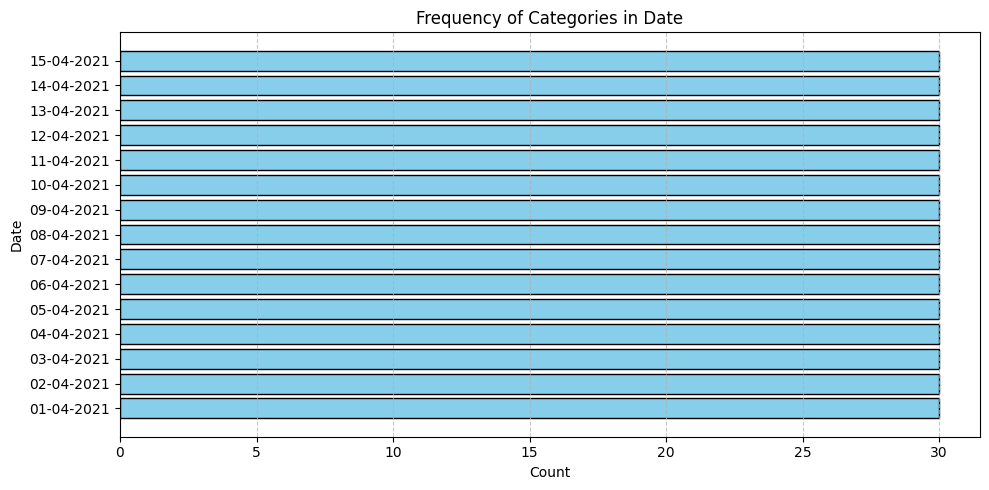

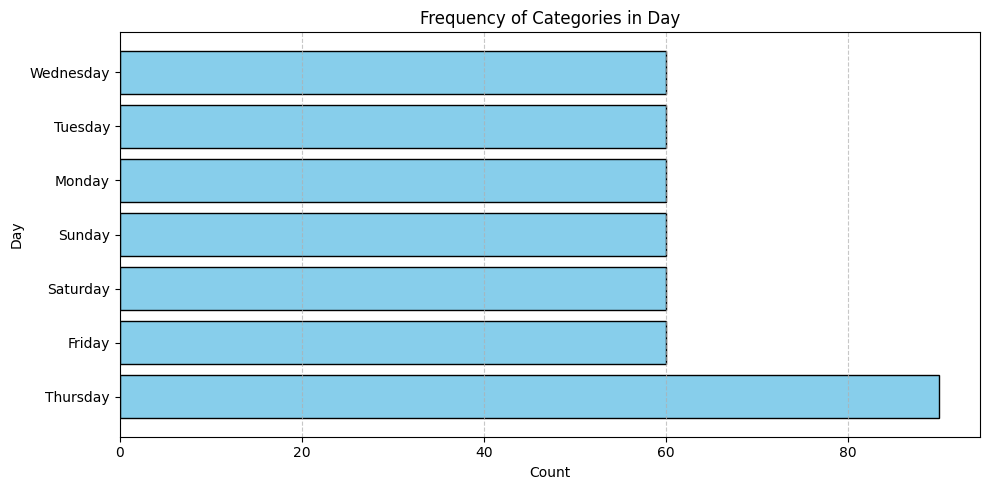

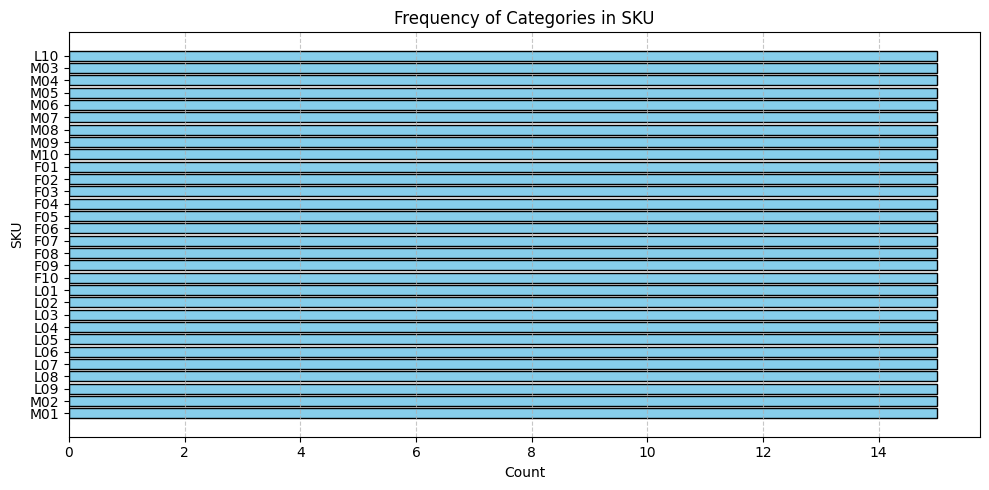

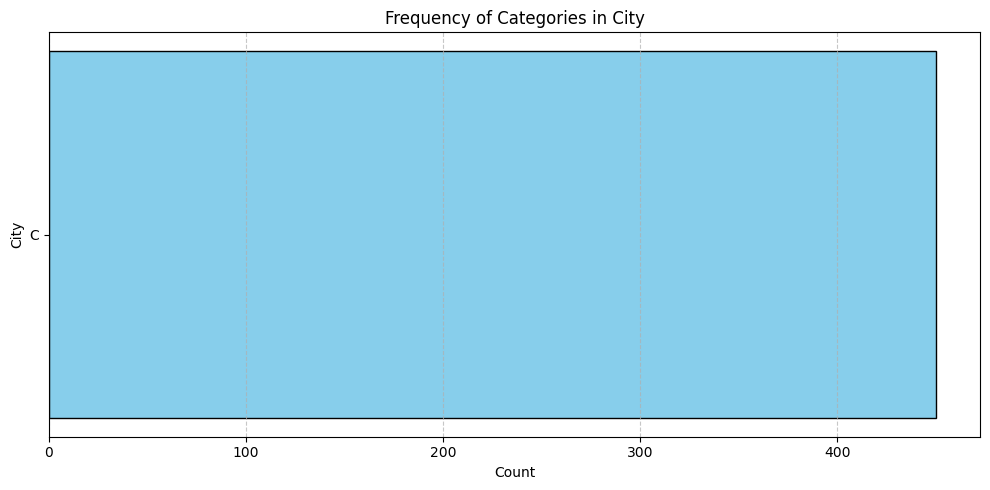

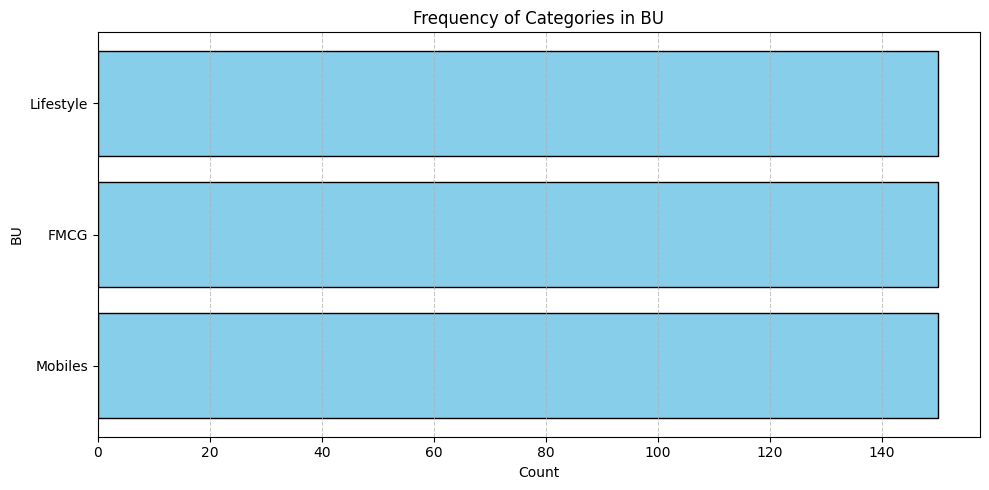

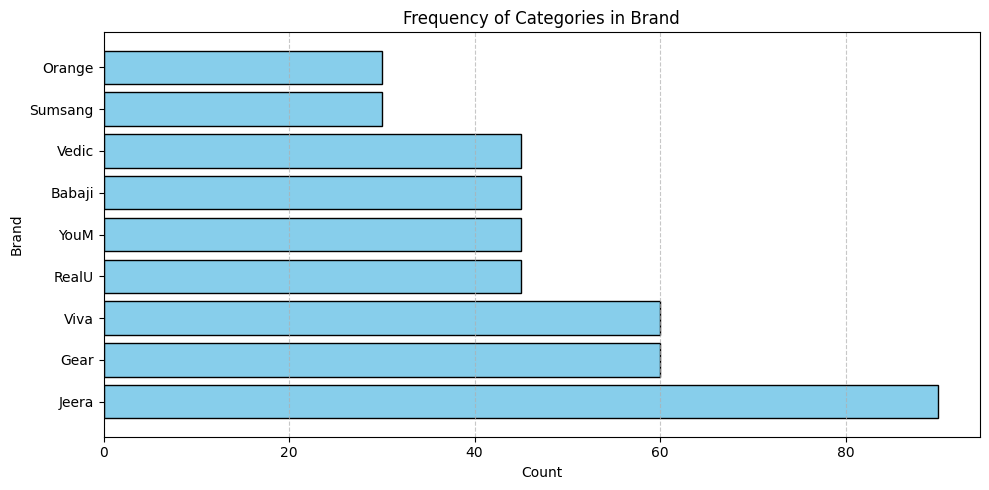

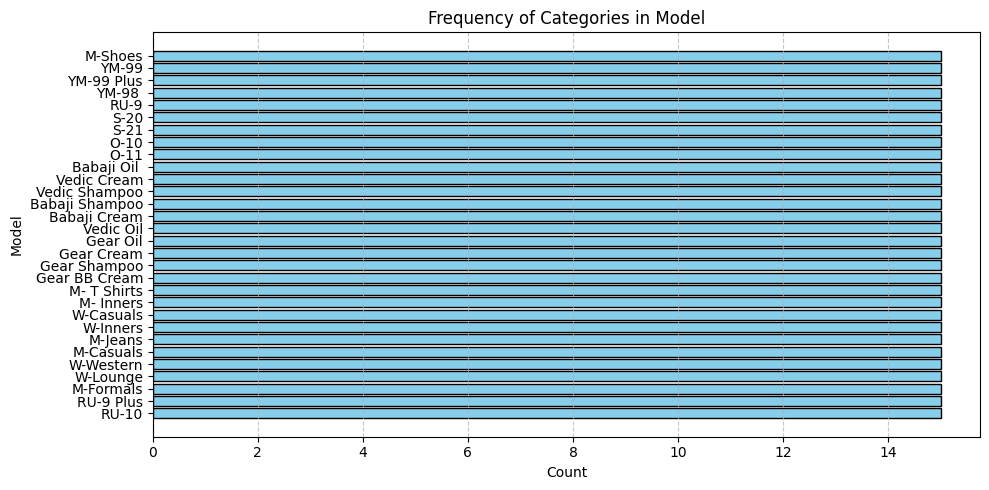

In [38]:
# Plot bar chart for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    value_counts = df[col].value_counts()
    plt.barh(value_counts.index, value_counts.values, color='skyblue', edgecolor='black')
    plt.title(f'Frequency of Categories in {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



In [39]:
"""1. Day
Distribution: Likely uniform or slightly skewed depending on business activity, If certain days (e.g., Friday or Monday) dominate, it may reflect peak sales periods or promotional timing.

2. City
Distribution: Some cities may have significantly more transactions,Indicates geographic concentration of sales. High-frequency cities could be key markets worth targeting for expansion or localized campaigns.

3. SKU
Distribution: Often skewed — a few SKUs dominate, Popular SKUs drive most of the sales. Rare SKUs may need review for relevance or inventory optimization.

4. BU (Business Unit)
Distribution: If only one or two units dominate, it suggests product line imbalance, Could guide diversification or focus strategies depending on business goals.

5. Brand
Distribution: Typically skewed — one brand may lead, Dominant brands are likely top performers. Underperforming brands may need repositioning or promotional support.

6. Model
Distribution: High granularity; some models may appear infrequently,Indicates product variety. Rare models could be discontinued or bundled to improve turnover.

7. Date
Distribution: If treated categorically, may show seasonal or campaign-driven spikes, Parsing this as a datetime object would allow deeper time-series analysis (e.g., trends, seasonality)."""

'1. Day\nDistribution: Likely uniform or slightly skewed depending on business activity, If certain days (e.g., Friday or Monday) dominate, it may reflect peak sales periods or promotional timing.\n\n2. City\nDistribution: Some cities may have significantly more transactions,Indicates geographic concentration of sales. High-frequency cities could be key markets worth targeting for expansion or localized campaigns.\n\n3. SKU\nDistribution: Often skewed — a few SKUs dominate, Popular SKUs drive most of the sales. Rare SKUs may need review for relevance or inventory optimization.\n\n4. BU (Business Unit)\nDistribution: If only one or two units dominate, it suggests product line imbalance, Could guide diversification or focus strategies depending on business goals.\n\n5. Brand\nDistribution: Typically skewed — one brand may lead, Dominant brands are likely top performers. Underperforming brands may need repositioning or promotional support.\n\n6. Model\nDistribution: High granularity; some

In [41]:
"""Standardization (z-score normalization) transforms data so that it has a mean of 0 and a standard deviation of 1, allowing for fair comparison across features with different scales. 
We use the formula for it is :
      𝑧=(𝑥-𝜇)/𝜎
x = original value
𝜇 = mean of the feature

𝜎 = standard deviation of the feature

𝑧 = standardized value"""

'Standardization (z-score normalization) transforms data so that it has a mean of 0 and a standard deviation of 1, allowing for fair comparison across features with different scales. \nWe use the formula for it is :\n      𝑧=(𝑥-𝜇)/𝜎\nx = original value\n𝜇 = mean of the feature\n\n𝜎 = standard deviation of the feature\n\n𝑧 = standardized value'

In [43]:
# Apply z-score normalization
df_standardized = df.copy()
for col in numerical_cols:
    mean = df[col].mean()
    std = df[col].std()
    df_standardized[col] = (df[col] - mean) / std

# View the standardized DataFrame
print(df_standardized[numerical_cols].head())


     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.347417   0.091072           2.922469          -0.829365         3.948422   
1  1.165831  -0.019548           1.329516          -0.851714         1.846958   
2  0.456880   0.312312           1.561038          -1.350129         1.621190   
3  0.220563   0.533552           1.717365          -1.947555         1.112568   
4 -0.488389  -0.130168          -0.188242           0.672990         0.227598   

   Net Sales Value  
0         2.801638  
1         1.269613  
2         1.543957  
3         1.763847  
4        -0.227342  


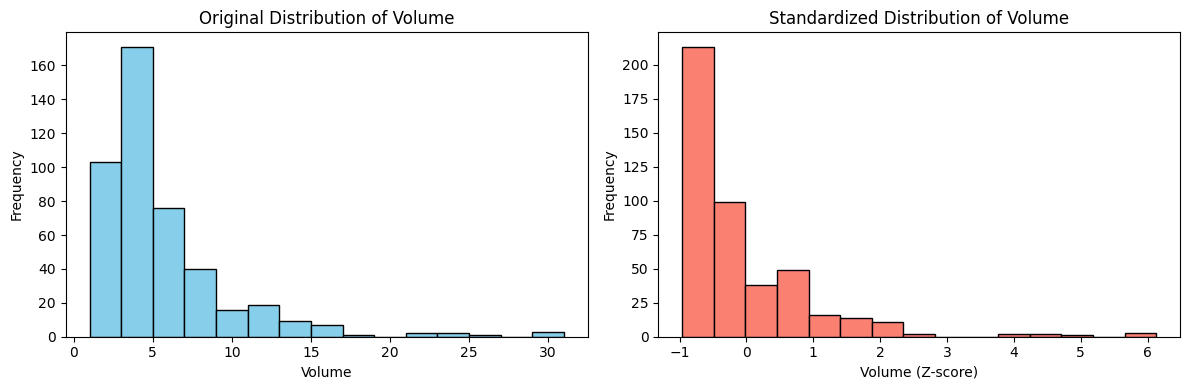

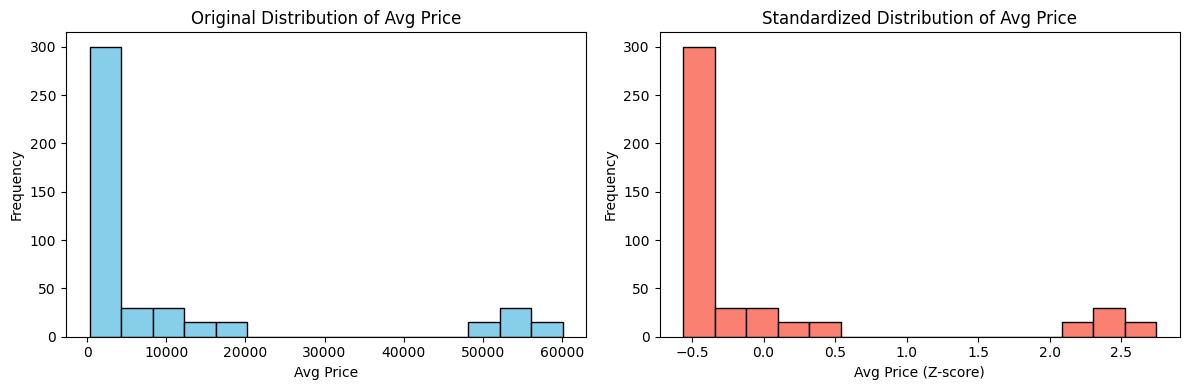

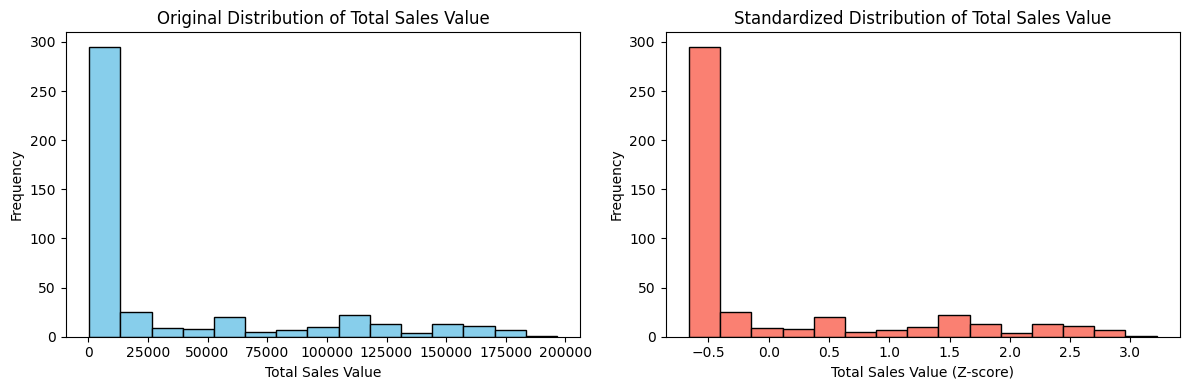

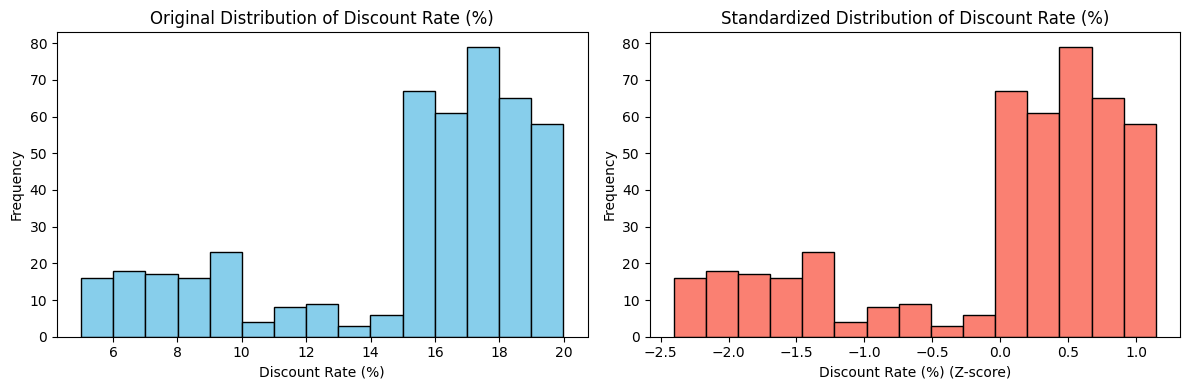

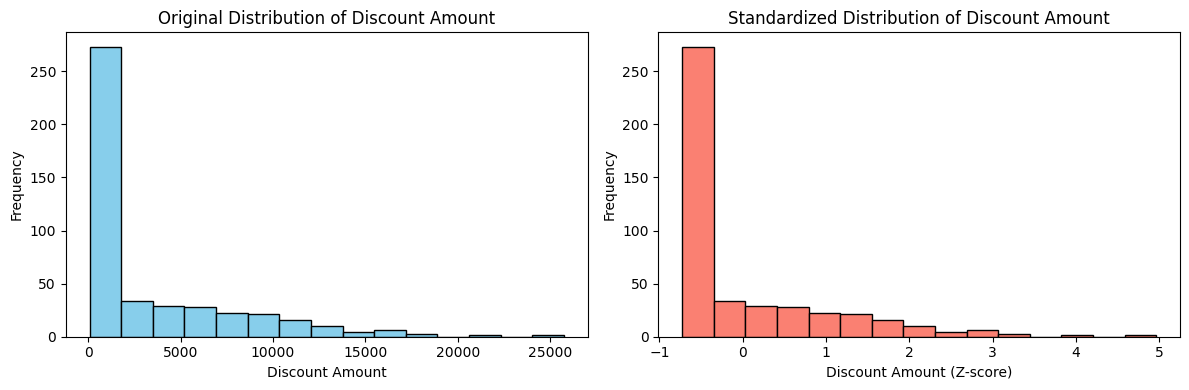

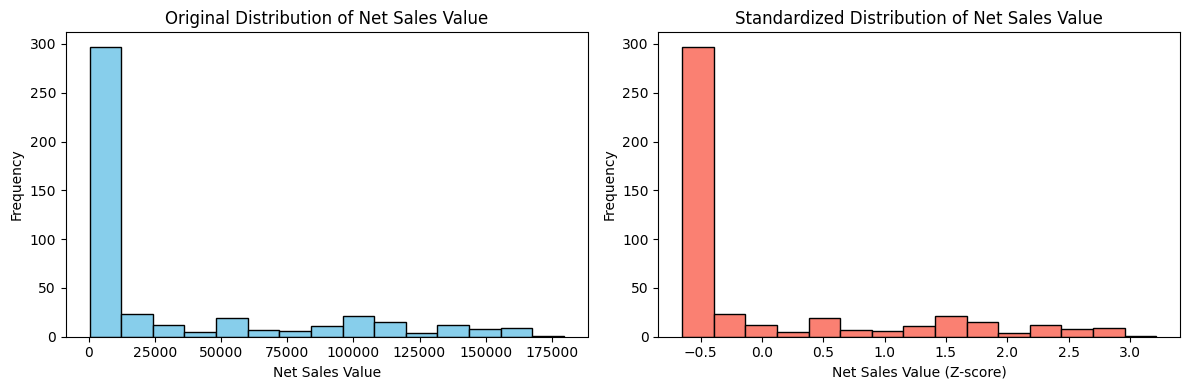

In [45]:
# Plot original vs standardized distributions
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Original
    axes[0].hist(df[col], bins=15, color='skyblue', edgecolor='black')
    axes[0].set_title(f'Original Distribution of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')
    
    # Standardized
    axes[1].hist(df_standardized[col], bins=15, color='salmon', edgecolor='black')
    axes[1].set_title(f'Standardized Distribution of {col}')
    axes[1].set_xlabel(f'{col} (Z-score)')
    axes[1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

In [47]:
"""Converting categorical data into dummy variables using one-hot encoding is essential because most machine learning models require numerical input and cannot interpret raw text labels"""

'Converting categorical data into dummy variables using one-hot encoding is essential because most machine learning models require numerical input and cannot interpret raw text labels'

In [48]:
# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

# View the transformed DataFrame
print(df_encoded.head())


   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0    160346.501180             True            False            False   
1     89323.897039             True            False            False   
2    102042.089843             True            False            False   
3    112235.925298             True            False            False   
4     19927.053770             True            False            False   

   Date_04-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            False  ...

In [50]:
# Display first 5 rows of the transformed dataset
print(df_encoded.head())


   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0    160346.501180             True            False            False   
1     89323.897039             True            False            False   
2    102042.089843             True            False            False   
3    112235.925298             True            False            False   
4     19927.053770             True            False            False   

   Date_04-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            False  ...

In [51]:
"""1. Numerical Data Insights
Right-skewed distributions dominate across metrics like Volume, Avg Price, Total Sales Value, and Net Sales Value.

Outliers are present above the upper whisker in most boxplots, especially in high-value transactions and premium-priced products.

Discount Rate (%) is relatively consistent, showing a tight distribution with minimal outliers.

Standardization (z-score normalization) successfully centered numerical features around zero, enabling fair comparison across scales.

2. Categorical Data Insights
Uneven category distributions: Certain cities, brands, and SKUs dominate, indicating concentrated sales activity.

One-hot encoding transformed categorical variables into binary columns, preparing the data for machine learning models.

Bar charts revealed frequency imbalances, suggesting potential areas for product or market diversification.

3. Data Quality Observations
No missing values were reported in the numerical summary.

Some categorical columns may benefit from grouping rare categories or cleaning inconsistent labels."""

'1. Numerical Data Insights\nRight-skewed distributions dominate across metrics like Volume, Avg Price, Total Sales Value, and Net Sales Value.\n\nOutliers are present above the upper whisker in most boxplots, especially in high-value transactions and premium-priced products.\n\nDiscount Rate (%) is relatively consistent, showing a tight distribution with minimal outliers.\n\nStandardization (z-score normalization) successfully centered numerical features around zero, enabling fair comparison across scales.\n\n2. Categorical Data Insights\nUneven category distributions: Certain cities, brands, and SKUs dominate, indicating concentrated sales activity.\n\nOne-hot encoding transformed categorical variables into binary columns, preparing the data for machine learning models.\n\nBar charts revealed frequency imbalances, suggesting potential areas for product or market diversification.\n\n3. Data Quality Observations\nNo missing values were reported in the numerical summary.\n\nSome categor